In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("cancer_reg.csv", encoding='latin1')


In [18]:
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [20]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [21]:
df = df.select_dtypes(exclude=['object'])
df = df.drop(columns = ['PctSomeCol18_24'])
df = df.drop(columns = ['PctPrivateCoverageAlone'])
df = df.drop(columns = ['PctEmployed16_Over'])

In [22]:
import statsmodels.api as sm

# Define the response variable
y = df['TARGET_deathRate']

# Define the predictor variables (excluding the response variable)
X = df.drop(columns=['TARGET_deathRate'])

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:17:07   Log-Likelihood:                -13335.
No. Observations:                3047   AIC:                         2.673e+04
Df Residuals:                    3018   BIC:                         2.690e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    121

# 1. Linearity

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

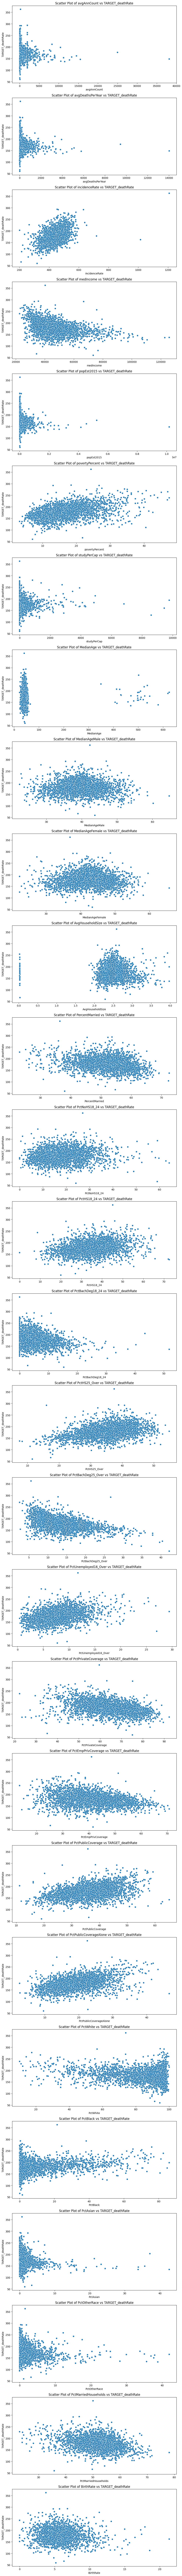

In [25]:
target = 'TARGET_deathRate'

# Define the features (excluding the target variable)
features = df.drop(columns=[target])

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(10, len(features.columns) * 5))

# Plot each feature against the target variable
for i, feature in enumerate(features.columns):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs {target}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [26]:
# Apply log transformation to predictor variables
X_log = np.log1p(X)

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

# Fit the OLS model
model = sm.OLS(y, X_log).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     381.8
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:27:55   Log-Likelihood:                -12143.
No. Observations:                3047   AIC:                         2.434e+04
Df Residuals:                    3018   BIC:                         2.452e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1748

In [ ]:
# important factors are incidentrate, umemploymentrte, medianage 

In [27]:
X_sqrt = np.sqrt(X)
X_sqrt = sm.add_constant(X_sqrt)

# Fit the OLS model
model = sm.OLS(y, X_sqrt).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:31:30   Log-Likelihood:                -13216.
No. Observations:                3047   AIC:                         2.649e+04
Df Residuals:                    3018   BIC:                         2.666e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     91

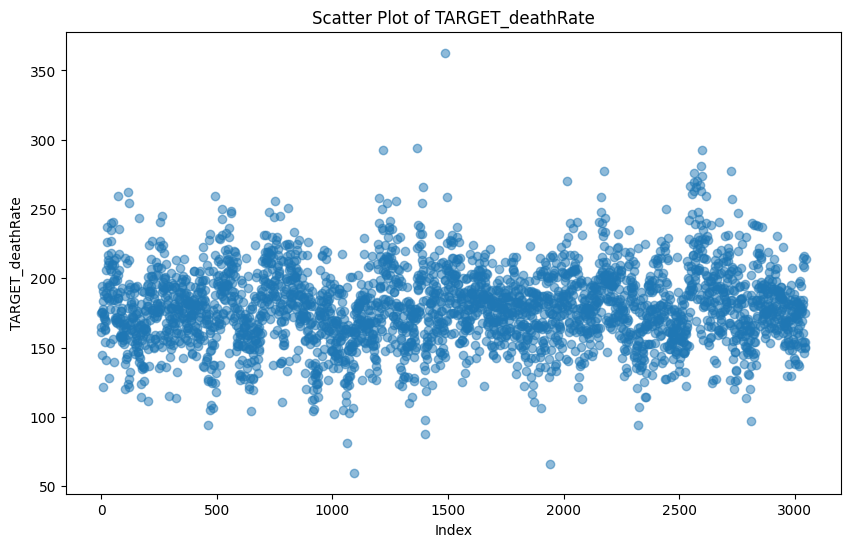

In [28]:
y = df['TARGET_deathRate']

# Create a scatter plot of the response variable
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, alpha=0.5)
plt.title('Scatter Plot of TARGET_deathRate')
plt.xlabel('Index')
plt.ylabel('TARGET_deathRate')
plt.show()

In [30]:
y_log = np.log1p(y)
X_log = np.log1p(X)

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

# Fit the OLS model
model = sm.OLS(y_log, X_log).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     411.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:36:07   Log-Likelihood:                 3694.7
No. Observations:                3047   AIC:                            -7331.
Df Residuals:                    3018   BIC:                            -7157.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15

In [31]:
y_sqrt = np.sqrt(y.clip(lower=0))
X_sqrt = np.sqrt(X.clip(lower=0))

# Add a constant to the model (intercept)
X_sqrt = sm.add_constant(X_sqrt)

# Fit the OLS model
model = sm.OLS(y_sqrt, X_sqrt).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:36:50   Log-Likelihood:                -3209.3
No. Observations:                3047   AIC:                             6477.
Df Residuals:                    3018   BIC:                             6651.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [32]:
from scipy import stats

In [34]:
constant_columns = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(columns=constant_columns)

# Apply Box-Cox transformation to the response variable
y_transformed, lambda_y = stats.boxcox(y + 1)  # Adding 1 to avoid zero values

# Apply Box-Cox transformation to the predictor variables
def boxcox_transform(x):
    transformed, _ = stats.boxcox(x + 1)  # Adding 1 to avoid zero values
    return transformed

X_transformed = X.apply(boxcox_transform)

# Add a constant to the model (intercept)
X_transformed = sm.add_constant(X_transformed)

# Fit the OLS model
model = sm.OLS(y_transformed, X_transformed).fit()

# Print the summary of the model
print(model.summary())

# Print the lambda value used for transformation
print(f"Lambda for response variable: {lambda_y}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     340.7
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:39:40   Log-Likelihood:                -7284.3
No. Observations:                3047   AIC:                         1.463e+04
Df Residuals:                    3018   BIC:                         1.480e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    906

Frequency Distribution:
 TARGET_deathRate
59.7     1
66.3     1
80.8     1
87.6     1
93.8     1
        ..
277.6    1
280.8    1
292.5    2
293.9    1
362.8    1
Name: count, Length: 1053, dtype: int64


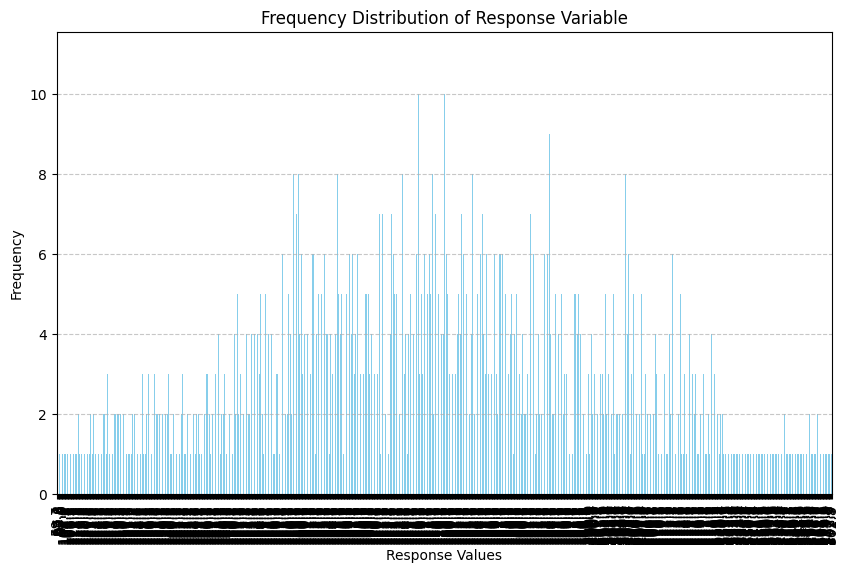

In [36]:
frequency_distribution = df['TARGET_deathRate'].value_counts().sort_index()

# Print frequency distribution
print("Frequency Distribution:\n", frequency_distribution)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
frequency_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Response Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Response Variable')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
c = 1  # Constant added to handle zero values
df['TARGET_deathRate_log'] = np.log(df['TARGET_deathRate'] + c)

# Assume you have applied OLS model previously on transformed data
# Apply Inverse Log Transformation
df['TARGET_deathRate_original'] = np.exp(df['TARGET_deathRate_log']) - c


y = df['TARGET_deathRate_original']

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     TARGET_deathRate_original   R-squared:                       0.519
Model:                                   OLS   Adj. R-squared:                  0.514
Method:                        Least Squares   F-statistic:                     116.2
Date:                       Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                               00:44:00   Log-Likelihood:                -13335.
No. Observations:                       3047   AIC:                         2.673e+04
Df Residuals:                           3018   BIC:                         2.690e+04
Df Model:                                 28                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

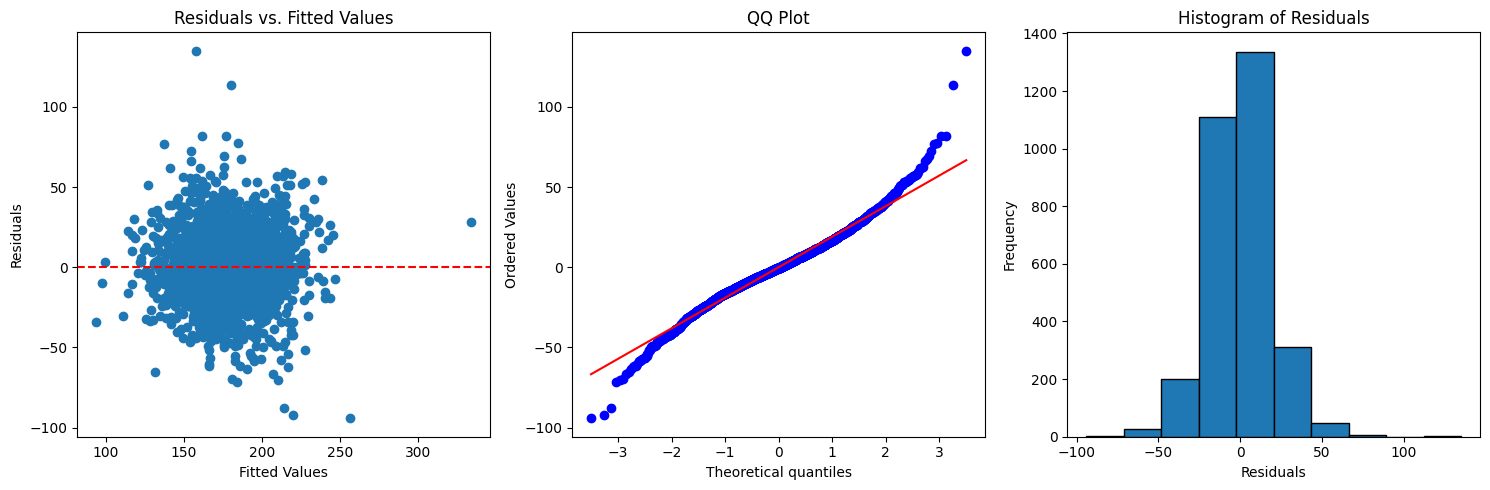

In [39]:
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Predict values and compute residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 1. Residuals vs. Fitted Values
axs[0].scatter(y_pred, residuals)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals vs. Fitted Values')

# 2. QQ Plot
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot')

# 3. Histogram of Residuals
axs[2].hist(residuals, bins=10, edgecolor='black')
axs[2].set_xlabel('Residuals')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of Residuals')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

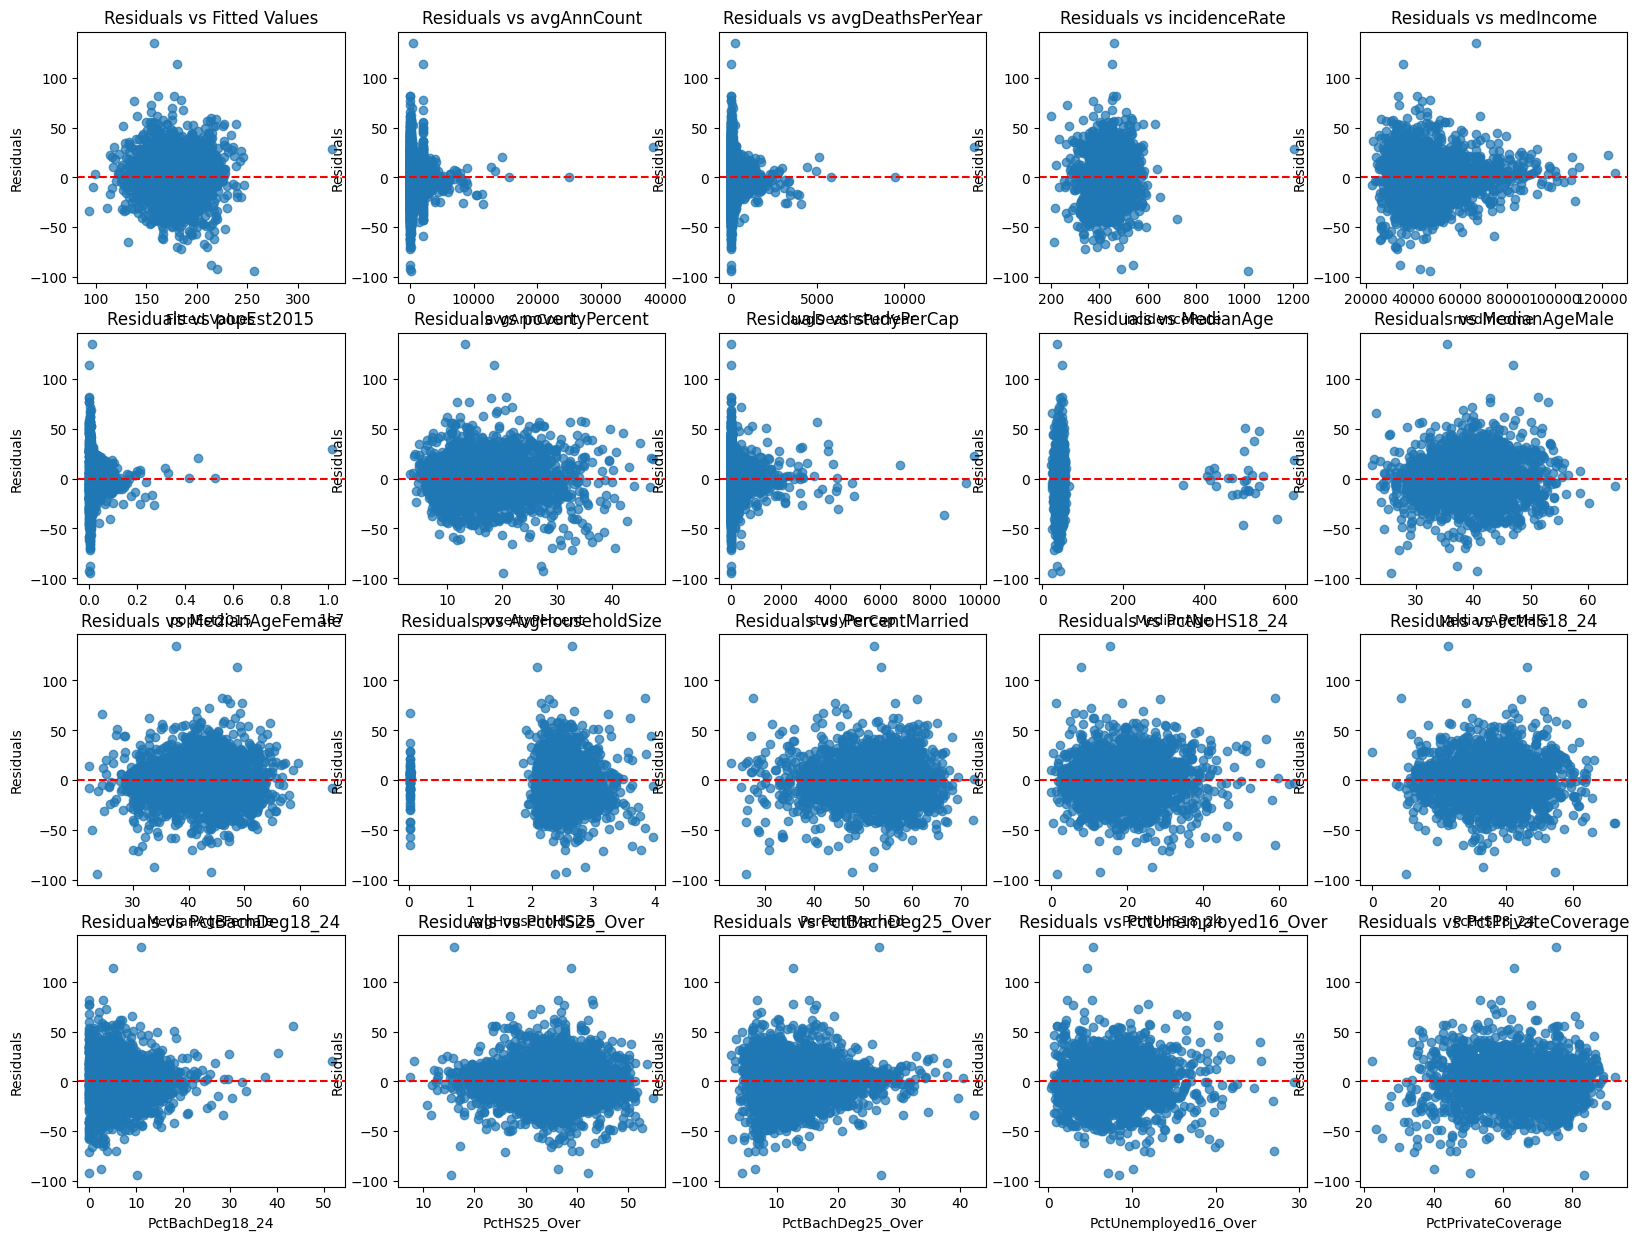

In [42]:
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Prepare the predictor names (excluding the constant term)
predictors = model.model.exog_names[1:]  # Skip the constant term

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df[predictor], residuals, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

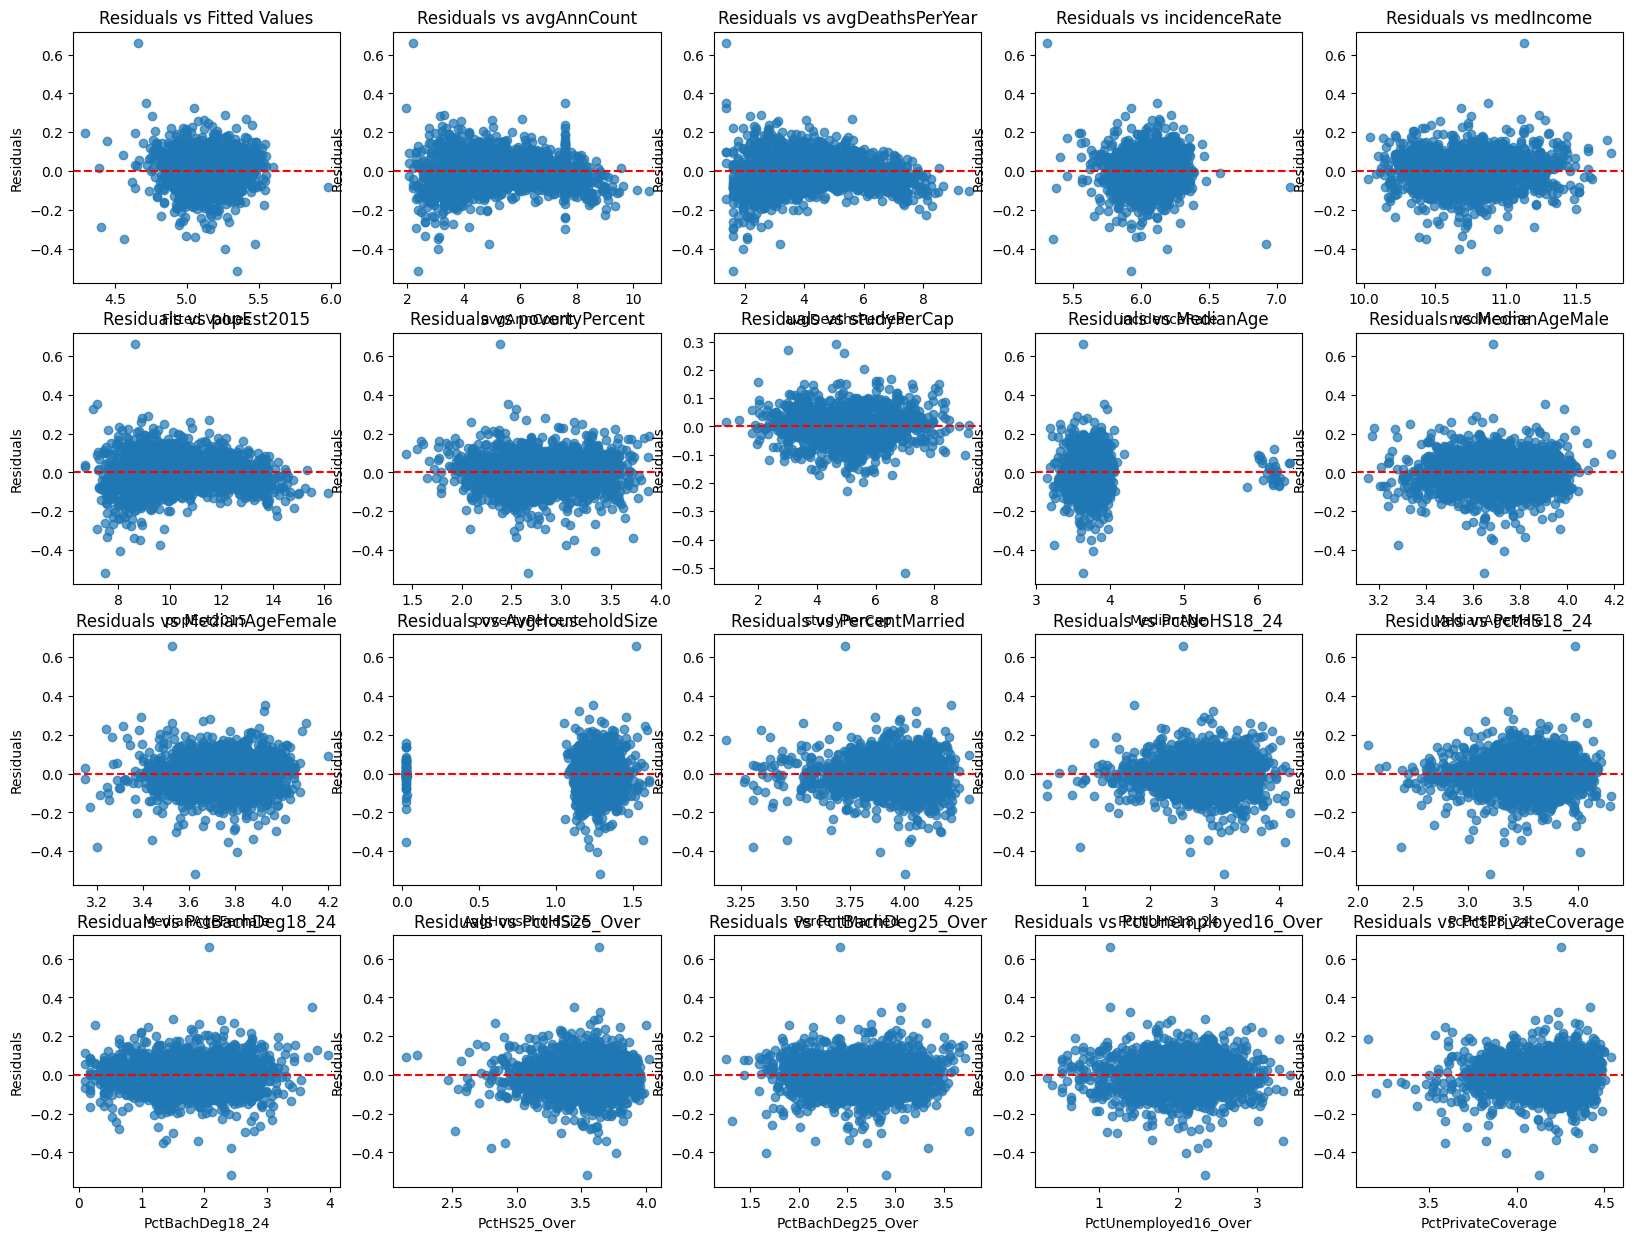

In [44]:
y_log = np.log1p(y)
X_log = np.log1p(X)

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

# Fit the OLS model
model_log = sm.OLS(y_log, X_log).fit()


# Extract residuals and fitted values
residuals_log = model_log.resid
fitted_values_log = model_log.fittedvalues

# Prepare the predictor names (excluding the constant term)
predictors_log = X_log.columns[1:]  # Skip the constant term

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values_log, residuals_log, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors_log):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df_log[predictor], residuals_log, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors_log) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Print model summary
print(model_log.summary())

# 2. Normality of residuals

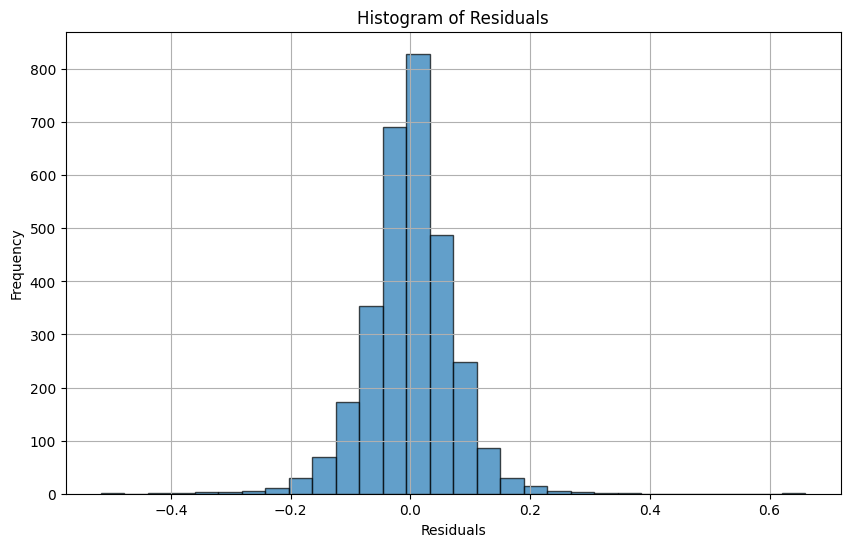

In [46]:
import matplotlib.pyplot as plt

# Extract residuals from the log-transformed model
residuals_log = model_log.resid

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_log, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


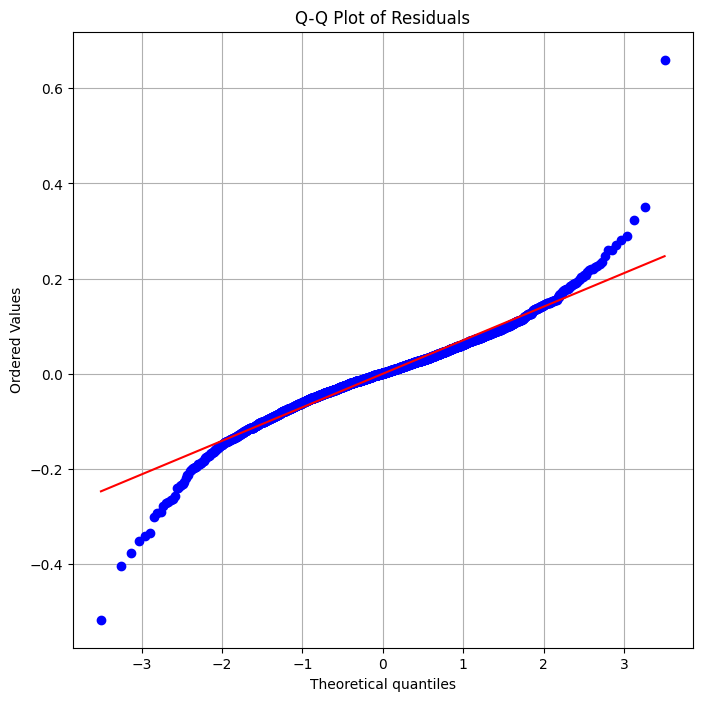

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract residuals from the log-transformed model
residuals_log = model_log.resid

# Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(residuals_log, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


In [48]:

import scipy.stats as stats

# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(residuals_log)

print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("The residuals seem to come from a normal distribution (fail to reject H0).")
else:
    print("The residuals do not seem to come from a normal distribution (reject H0).")


Shapiro-Wilk Test Statistic: 0.9585
P-Value: 0.0000
The residuals do not seem to come from a normal distribution (reject H0).


In [49]:
import scipy.stats as stats

# Perform Omnibus test for normality
stat, p_value = stats.normaltest(residuals_log)

print(f"Omnibus Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("The residuals seem to come from a normal distribution (fail to reject H0).")
else:
    print("The residuals do not seem to come from a normal distribution (reject H0).")


Omnibus Test Statistic: 362.7947
P-Value: 0.0000
The residuals do not seem to come from a normal distribution (reject H0).


In [50]:
import scipy.stats as stats

# Perform Jarque-Bera test for normality
stat, p_value = stats.jarque_bera(residuals_log)

print(f"Jarque-Bera Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print("The residuals seem to come from a normal distribution (fail to reject H0).")
else:
    print("The residuals do not seem to come from a normal distribution (reject H0).")


Jarque-Bera Test Statistic: 3550.7056
P-Value: 0.0000
The residuals do not seem to come from a normal distribution (reject H0).


In [59]:
log_X = X.drop(columns=['const'])

In [65]:
y_log = np.log1p(y)

# Standardize the predictors and response variable
X_standardized = (log_X - log_X.mean()) / np.sqrt(log_X.var())
y_standardized = (y_log - y_log.mean()) / np.sqrt(y_log.var())

# Add a constant to the predictors for the intercept
X_standardized_with_const = sm.add_constant(X_standardized)

# Fit the OLS model
model_standardized = sm.OLS(y_standardized, X_standardized_with_const).fit()
print(model_standardized.summary())

                                OLS Regression Results                               
Dep. Variable:     TARGET_deathRate_original   R-squared:                       0.514
Model:                                   OLS   Adj. R-squared:                  0.510
Method:                        Least Squares   F-statistic:                     114.0
Date:                       Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                               01:40:17   Log-Likelihood:                -3223.5
No. Observations:                       3047   AIC:                             6505.
Df Residuals:                           3018   BIC:                             6680.
Df Model:                                 28                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [67]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Initialize the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Standardize the predictors
X_standardized = scaler_X.fit_transform(X)
# Standardize the response variable
y_standardized = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Add a constant to the predictors for the intercept
X_standardized_with_const = sm.add_constant(X_standardized)

# Fit the OLS model
model_standardized = sm.OLS(y_standardized, X_standardized_with_const).fit()


print(model_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        01:42:04   Log-Likelihood:                -3209.3
No. Observations:                3047   AIC:                             6477.
Df Residuals:                    3018   BIC:                             6651.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.503e-15      0.013   1.98e-13      1.0

In [ ]:
# Get fitted values and residuals
fitted_values_standardized = model_standardized.fittedvalues
residuals_standardized = model_standardized.resid

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values_standardized, residuals_standardized, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(X.columns):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(X_standardized[:, i], residuals_standardized, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(X.columns) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Print the summary of the model
print(model_standardized.summary())

# 3. Homoscedasticity

In [68]:
y_log = np.log1p(y)
X_log = np.log1p(X)

# Add a constant to the model (intercept)
X_log = sm.add_constant(X_log)

# Fit the OLS model
model_log = sm.OLS(y_log, X_log).fit()

# Print the summary of the model
print(model_log.summary())

                                OLS Regression Results                               
Dep. Variable:     TARGET_deathRate_original   R-squared:                       0.792
Model:                                   OLS   Adj. R-squared:                  0.791
Method:                        Least Squares   F-statistic:                     411.6
Date:                       Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                               01:52:51   Log-Likelihood:                 3694.7
No. Observations:                       3047   AIC:                            -7331.
Df Residuals:                           3018   BIC:                            -7157.
Df Model:                                 28                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

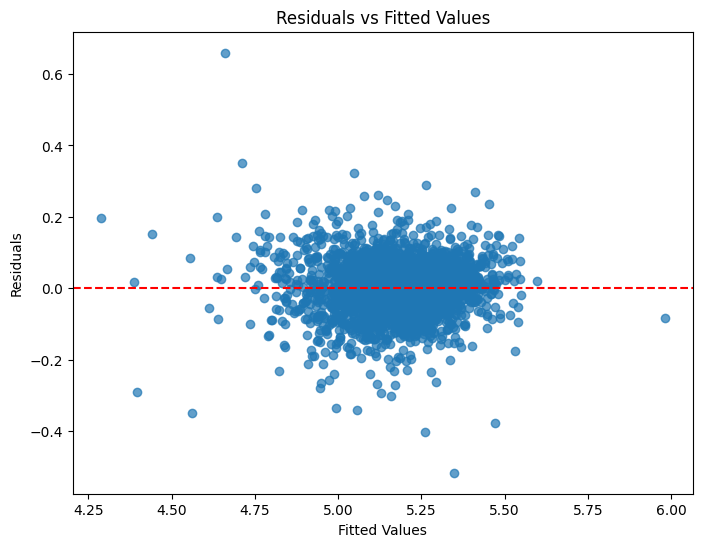

In [69]:
import matplotlib.pyplot as plt

# Extract residuals and fitted values from your model
fitted_values = model_log.fittedvalues
residuals = model_log.resid

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
# it is almost constant variance

# 4. Multicollinearity

In [71]:
import pandas as pd
log_X = X.drop(columns=['const'])
# Assuming df is your DataFrame
correlation_matrix = log_X.corr()
correlation_matrix

avgAnnCount  avgDeathsPerYear  incidenceRate  \
avgAnnCount                1.000000          0.939408       0.073553   
avgDeathsPerYear           0.939408          1.000000       0.062690   
incidenceRate              0.073553          0.062690       1.000000   
medIncome                  0.269145          0.223207      -0.001036   
popEst2015                 0.926894          0.977634       0.026912   
povertyPercent            -0.135694         -0.066918       0.009046   
studyPerCap                0.082071          0.063488       0.077283   
MedianAge                 -0.024098         -0.024599       0.018089   
MedianAgeMale             -0.124969         -0.148487      -0.014733   
MedianAgeFemale           -0.122844         -0.144069      -0.009106   
AvgHouseholdSize           0.064788          0.086161      -0.118400   
PercentMarried            -0.106108         -0.181029      -0.119524   
PctNoHS18_24              -0.143327         -0.136794      -0.170762   
PctHS18_24                -0.182054         -0.151418       0.022644   
PctBachDeg18_24            0.284176          0.259761       0.046835   
PctHS25_Over              -0.311375         -0.295929       0.121725   
PctBachDeg25_Over          0.321021          0.293210      -0.038177   
PctUnemployed16_Over      -0.009016          0.069701       0.099979   
PctPrivateCoverage         0.132244          0.056183       0.105174   
PctEmpPrivCoverage         0.202349          0.160124       0.149825   
PctPublicCoverage         -0.173548         -0.131687       0.046109   
PctPublicCoverageAlone    -0.093699         -0.027338       0.040812   
PctWhite                  -0.136501         -0.187159      -0.014510   
PctBlack                   0.031376          0.084607       0.113489   
PctAsian                   0.435071          0.443074      -0.008123   
PctOtherRace               0.209184          0.215149      -0.208748   
PctMarriedHouseholds      -0.106221         -0.160266      -0.152176   
BirthRate                 -0.034508         -0.074420      -0.118181   

                        medIncome  popEst2015  povertyPercent  studyPerCap  \
avgAnnCount              0.269145    0.926894       -0.135694     0.082071   
avgDeathsPerYear         0.223207    0.977634       -0.066918     0.063488   
incidenceRate           -0.001036    0.026912        0.009046     0.077283   
medIncome                1.000000    0.235523       -0.788965     0.044003   
popEst2015               0.235523    1.000000       -0.065299     0.055722   
povertyPercent          -0.788965   -0.065299        1.000000    -0.055652   
studyPerCap              0.044003    0.055722       -0.055652     1.000000   
MedianAge               -0.013288   -0.025219       -0.029280    -0.026030   
MedianAgeMale           -0.091663   -0.176608       -0.214001    -0.036647   
MedianAgeFemale         -0.153278   -0.177932       -0.148164    -0.030577   
AvgHouseholdSize         0.112065    0.109940        0.074308    -0.004071   
PercentMarried           0.355123   -0.160463       -0.642857    -0.038143   
PctNoHS18_24            -0.289383   -0.126582        0.288106    -0.090387   
PctHS18_24              -0.190006   -0.151821        0.094211    -0.057035   
PctBachDeg18_24          0.492810    0.248375       -0.387122     0.063819   
PctHS25_Over            -0.471348   -0.311849        0.194361    -0.085128   
PctBachDeg25_Over        0.704928    0.297463       -0.531600     0.108594   
PctUnemployed16_Over    -0.453108    0.050768        0.655148    -0.031957   
PctPrivateCoverage       0.724175    0.052677       -0.822534     0.092545   
PctEmpPrivCoverage       0.747294    0.158650       -0.683100     0.100063   
PctPublicCoverage       -0.754822   -0.160066        0.651162    -0.051497   
PctPublicCoverageAlone  -0.719756   -0.041469        0.798642    -0.055512   
PctWhite                 0.167225   -0.190095       -0.509433     0.023291   
PctBlack                -0.270232    0.073044        0.511530  

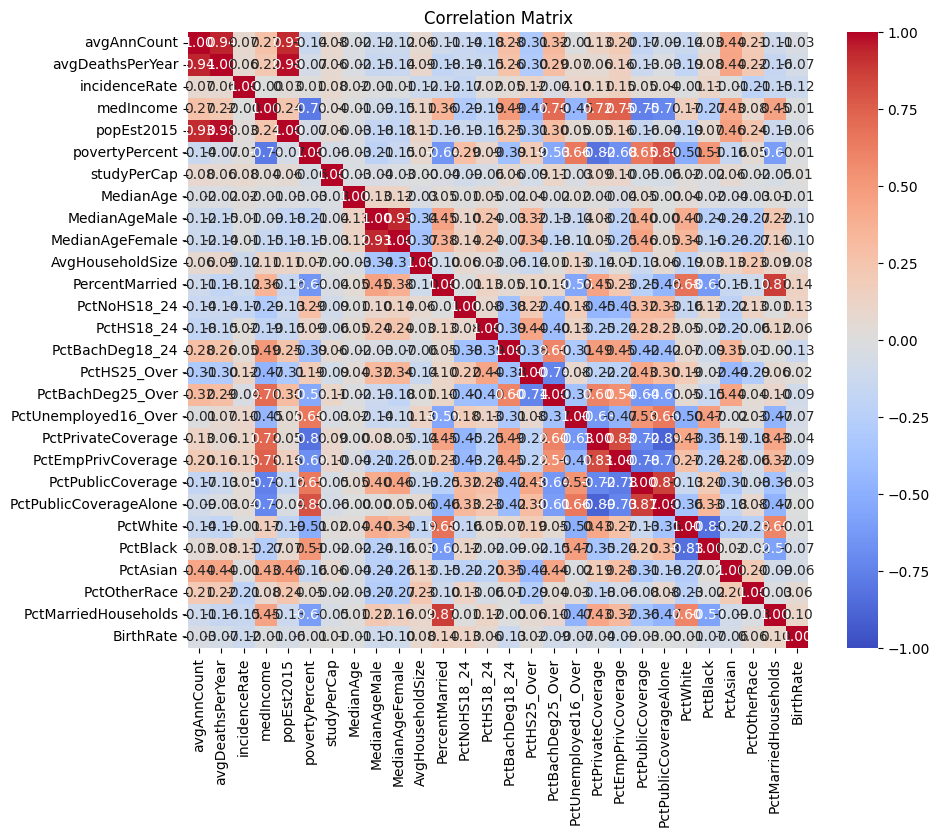

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()


In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df is your DataFrame with only predictor variables
# Add a constant to the predictors for the VIF calculation
log_X = add_constant(log_X)

# Calculate VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(log_X.shape[1])]

# Display VIF values
print(vif_data)


                  Variable          VIF
0                    const  1416.096997
1              avgAnnCount     9.712524
2         avgDeathsPerYear    31.324711
3            incidenceRate     1.267755
4                medIncome     7.633063
5               popEst2015    26.409568
6           povertyPercent     7.895452
7              studyPerCap     1.046245
8                MedianAge     1.024105
9            MedianAgeMale     9.648138
10         MedianAgeFemale    10.543963
11        AvgHouseholdSize     1.375735
12          PercentMarried     8.362572
13            PctNoHS18_24     1.671006
14              PctHS18_24     1.618429
15         PctBachDeg18_24     1.959765
16            PctHS25_Over     3.756117
17       PctBachDeg25_Over     5.594458
18    PctUnemployed16_Over     2.501786
19      PctPrivateCoverage    15.825331
20      PctEmpPrivCoverage     7.699615
21       PctPublicCoverage    23.621886
22  PctPublicCoverageAlone    22.887802
23                PctWhite     7.149203


In [88]:
log_X_1 = log_X.drop(columns=['PctPrivateCoverage'])

In [90]:
# Combine MedianAgeMale and MedianAgeFemale
log_X['MedianAgeCombined'] = (log_X['MedianAgeMale'] + log_X['MedianAgeFemale']) / 2
log_X = log_X.drop(columns=['MedianAgeMale', 'MedianAgeFemale'])


In [92]:

# Fit the OLS model
model1 = sm.OLS(y_log, log_X).fit() 

# Print the summary of the model
print(model1.summary())

                                OLS Regression Results                               
Dep. Variable:     TARGET_deathRate_original   R-squared:                       0.513
Model:                                   OLS   Adj. R-squared:                  0.509
Method:                        Least Squares   F-statistic:                     118.0
Date:                       Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                               02:24:14   Log-Likelihood:                 2396.1
No. Observations:                       3047   AIC:                            -4736.
Df Residuals:                           3019   BIC:                            -4568.
Df Model:                                 27                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [91]:
log_X

const  avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  \
0       1.0  1397.000000               469     489.800000      61898   
1       1.0   173.000000                70     411.600000      48127   
2       1.0   102.000000                50     349.700000      49348   
3       1.0   427.000000               202     430.400000      44243   
4       1.0    57.000000                26     350.100000      49955   
...     ...          ...               ...            ...        ...   
3042    1.0  1962.667684                15     453.549422      46961   
3043    1.0  1962.667684                43     453.549422      48609   
3044    1.0  1962.667684                46     453.549422      51144   
3045    1.0  1962.667684                52     453.549422      50745   
3046    1.0  1962.667684                48     453.549422      41193   

      popEst2015  povertyPercent  studyPerCap  MedianAge  AvgHouseholdSize  \
0         260131            11.2   499.748204       39.3              2.54   
1          43269            18.6    23.111234       33.0              2.34   
2          21026            14.6    47.560164       45.0              2.62   
3          75882            17.1   342.637253       42.8              2.52   
4          10321            12.5     0.000000       48.3              2.34   
...          ...             ...          ...        ...               ...   
3042        6343            12.4     0.000000       44.2              2.08   
3043       37118            18.8   377.175494       30.4              2.90   
3044       34536            15.0  1968.959926       30.9              3.04   
3045       25609            13.3     0.000000       39.0              2.56   
3046       37030            13.9     0.000000       26.2              2.83   

      ...  PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  \
0     ...                41.6               32.9                    14.0   
1     ...                43.6               31.1                    15.3   
2     ...                34.9               42.1                    21.1   
3     ...                35.0               45.3                    25.0   
4     ...                35.1               44.0                    22.7   
...   ...                 ...                ...                     ...   
3042  ...                44.6               31.7                    13.2   
3043  ...                48.6               28.8                    17.7   
3044  ...                47.8               26.6                    16.8   
3045  ...                49.6               29.5                    14.0   
3046  ...                22.9               25.1                    12.6   

       PctWhite   PctBlack  PctAsian  PctOtherRace  PctMarriedHouseholds  \
0     81.780529   2.594728  4.821857      1.843479             52.856076   
1     89.228509   0.969102  2.246233      3.741352             45.372500   
2     90.922190   0.739673  0.465898      2.747358             54.444868   
3     91.744686   0.782626  1.161359      1.362643             51.021514   
4     94.104024   0.270192  0.665830      0.492135             54.027460   
...         ...        ...       ...           ...                   ...   
3042  90.280811   3.837754  0.327613      1.700468             51.063830   
3043  75.706245   2.326771  4.044920     14.130288             52.007937   
3044  87.961629   2.313188  1.316472      5.680705             55.153949   
3045  92.905681   1.176562  0.244632      2.131790             58.484232   
3046  70.098132  16.590100  3.177753      1.356457             56.040242   

      BirthRate  MedianAgeCombined  
0      6.118831              39.30  
1      4.333096              32.95  
2      3.729488              44.90  
3      4.603841              42.80  
4      6.796657              48.35  
...         ...                ...  
3042   7.773512              44.95  
3043   8.186470              30.35  
3044   7.809192              30.85  
3045   7